# Identity activation function

* [Wikipedia - Activation function](https://en.wikipedia.org/wiki/Activation_function)

Identity activation function은 매우 단순하지만, 강력한 힘을 갖고 있습니다.<br>
특히 continuous target을 예측할때 매우 유용하게 사용될수 있습니다. 

# Neural Network

### Cost Function (Sum of squared Errors)

먼저 **Object function** $ J(w) $ (Sum of squared Errors - SSE) 를 정의합니다.<br>
이때 $ \phi(z^{(i)}) $ 는 Identity activation function 입니다.

$$ \begin{align} 
z &= \sum_{j=0} w_j x_j = w^T x + b \\
\phi(z^{(i)}) &= z^{(i)} \\
J(w) &= \frac{1}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)^2 \\
\end{align} $$

### Calculate Gradient with regard to weights $ w $

$$ \begin{align} 
\frac{\partial J}{\partial w_j} &= \frac{\partial}{\partial w_j}  \frac{1}{N} \sum_i \left(y^{(i)} - \phi(z^{(i)}) \right)^2 \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \frac{\partial}{\partial w_j} \left(y^{(i)} - \phi(z^{(i)}) \right) \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \frac{\partial}{\partial w_j} \left[ y^{(i)} - \sum_k \left( w^{(i)}_k x^{(i)}_k + b^{i} \right) \right] \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)(0 - (1 \cdot x^{(i)}_j + 0 ) ) \\
&= - \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \odot x^{(i)}_j
\end{align}$$

### Calculate Gradient with regard to bias $ b $

$$ \begin{align} 
\frac{\partial J}{\partial b_j} &= \frac{\partial}{\partial b_j}  \frac{1}{N} \sum_i \left(y^{(i)} - \phi(z^{(i)}) \right)^2 \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \frac{\partial}{\partial b_j} \left(y^{(i)} - \phi(z^{(i)}) \right) \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) \frac{\partial}{\partial b_j} \left[ y^{(i)} - \sum_k \left( w^{(i)}_k x^{(i)}_k + b^{i} \right) \right] \\
&= \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)(0 - (0 + 1 ) ) \\
&= - \frac{2}{N} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) 
\end{align}$$

### Update Weights

$$ \begin{align} 
\Delta w &= - \eta \nabla J(w)  \\
w &= w + \Delta w
\end{align}$$

# Derivative of the Identity activation function

Identity activation function 은 다음과 같습니다. 

$$ f(x) = x $$

x값에 대한 derivation은 다음과 같습니다.

$$ f^{\prime}(x) = 1 $$

**실제로는.. Identity Activation은 있는 값을 그대로 전달하는 것이기 때문에, derivative(yhat) 같은 값을 구하지 않습니다.<br>
실제로는 없는 것으로 치면 됩니다.**

In [1]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


### Data

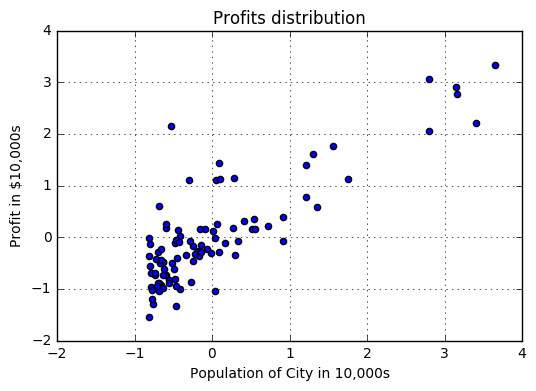

In [2]:
data = np.loadtxt('../../data/linear-regression/ex1data1.txt', delimiter=',')
X = data[:, 0].reshape(data[:, 0].shape[0], 1) # Population
Y = data[:, 1].reshape(data[:, 1].shape[0], 1) # profit

# Standardization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)

scatter(X, Y)
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
grid()

Mean Squared Error (less is good): 1.9851376897
Mean Squared Error (less is good): 1.76244027984
Mean Squared Error (less is good): 1.0423548062
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 1.0
Mean Squared Error (less is good): 0.725250038743
Mean Squared Error (less is good): 0.686136644177


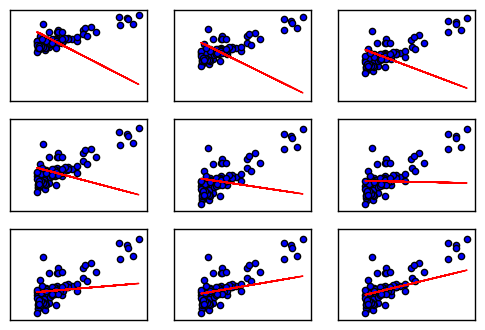

In [3]:
w = np.array([-0.1941133,  -2.07505268])

def predict(w, X):
    N = len(X)
    yhat = w[1:].dot(X.T) + w[0]
    yhat = yhat.reshape(X.shape)
    return identity(yhat)

def identity(x):
    return x

def sgd(X, Y, w, eta=0.1):
    N = len(X)
    
    
    for i in range(N):
        # Sample
        x = X[i]
        y = Y[i]

        # predict
        yhat = predict(w, x)

        # Calculate Gradients
        cost = y - yhat
        gradient_w = -2/N * np.sum(cost*x)
        gradient_b = -2/N * np.sum(cost)

        # Update
        w[1:] = w[1:] - eta*gradient_w
        w[0] = w[0] - eta*gradient_b
    return w
    

for i in range(1, 10):
    w = sgd(X, Y, w)
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')
    grid()
    axes.grid()
    
    yhats = np.where(yhat >= 0.5, 1, 0)
    accuracy = mean_squared_error(Y, yhats)
    print('Mean Squared Error (less is good):', accuracy)